## PHYS316 - AdLab
### @ RIT, Fri 28 Jan 2022, 10:00-10:50
### Dr. Aaron McGowan
<img src="RITlogo.png" alt="NYS MTP" width="200" height="200"/>

### We will investigate how your random/statistical uncertainty (thus the number of sig figs you may quote in your result) depends on the amount of data you collect.  Additionally, we will investigate how to evaluate the impact of systematic uncertainties (known unknowns) on your quoted final result.  Often in experiments, you will not have an analytic function that you can apply your standard uncertainty propagation to, and we will learn how to deal with such cases numerically.

# Definitions

*True value* : The value of our quantity to be measured at the time of measurement.  The true value cannot be known, by definition.

*Measured value* : The value of either a single reading from a measurement device, or a derived value based upon multiple measurements.  Simplest example of a derived value is the mean of multiple measurements.

*Error* : The difference between our measured value and the true value.  The error cannot be known, by definition.

*Uncertainty* : The experimenter's best estimate of the "standard error" (SE) of the measured value.

*XX% Confidence interval* : The interval of possible values that will contain the true value with XX% confidence.  The range from one SE less than the measured value to one SE greater than the measured value is defined as a 68% confidence interval.  This relies on the assumption that measurement errors are "Gaussian distributed".


## What uncertainty should be assigned to a single reading of a digital meter, one that does not fluctuate with time?  

--> We assume the true value is stable in time and that the meter is perfectly accurate, but limited by its design precision.  

--> We are taught from a young age to use half of the least count on the meter, but this is truly the *largest* error we could be making on any single reading!  

--> Say true value is 1.47 V, and our meter displays only to the nearest 0.1 V.  The meter will read 1.5 V, and our error will be 0.03 V.  Reading 1.5 means the true value is between 1.45 and 1.55.  If we state the measurement as 1.50 +/- 0.05 V, we overstate our uncertainty.  This is known as being "too conservative".  

--> The best estimate of our uncertainty for this case derives from the "uniform random distribution".  Taking the square root of the variance yields a value of 1/sqrt(12) or about 0.29 times the least count.  Wolfram has a nice treatment of this: http://mathworld.wolfram.com/UniformDistribution.html

## --> We should record the reading 1.5 +/- 0.03, because about 2/3 of the possible values lie between 1.47 and 1.53.  It is OK to violate the precision-matching rules when recording raw data - don't violate them for reporting final results! 

## Imagine instead that the meter is perfectly accurate, but the true value is physically fluctuating with time due to physical variation, instrument variation, statistical variation...anything that is randomly distributed.  A good example is the Johnson noise voltage measured across a resistor at room temperature.  We could collect 10 data points over time, say {1.5, 1.5, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4, 1.5}.

--> Our best estimate of the true value is the *mean* of the distribution of measured values, the simple arithmetic average.
<img src="mean.png" alt="NYS MTP" width="200" height="200"/>

--> And the standard deviation is 
<img src="stdev.png" alt="NYS MTP" width="200" height="200"/>
where we should replace the n with n-1 in situations where the number of measurements is 'small'.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from math import *
from pylab import *
from scipy.optimize import curve_fit
from lmfit import  Model
import os

trueV = 1.47

voltages = [1.5, 1.5, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4, 1.5]
N = len(voltages)
meanV = mean(voltages) 
stdev = std(voltages)
print("We took",N,"measurements.")
print("Mean voltage is", meanV, "V.")
print("Standard deviation is",stdev,"V.")

We took 10 measurements.
Mean voltage is 1.48 V.
Standard deviation is 0.060000000000000046 V.


### But is the standard deviation of our data equivalent to the standard error on the mean?  NO!  A person who collects 100 measurements of the same quantity should be 'less uncertain' of true value than someone who collects 10 measurements.

The standard deviation should be thought of as our best estimate of the precision of our experiment.  It will not tend to zero with an infinite number of measurements.

However, the standard error of our mean will tend to zero with an infinite number of measurements!  To find our standard error, we must divide the standard deviation by the square root of N.

In [2]:
std_err = stdev/sqrt(N)
print("We should report a measurement result of",meanV,"+/-",std_err,"V.")
#print("Or should we report",round(meanV,2),"+/-",round(std_err,2),"V ?")

We should report a measurement result of 1.48 +/- 0.01897366596101029 V.


### Should we stop here and spew forth all of those digits with confidence?

# How many significant figures should I use?

We must focus first on how well we know our standard error.  It benefits from the same relative accuracy improvement as the standard error: 1/sqrt(N).  The more data we collect, the smaller the standard error becomes, AND the better we know our standard error.  

## With only N=10 data points, sqrt(N)=3.16, and 1/sqrt(N)=0.316, so we only know the standard error to within 32%.  The SE above likely lies in the range 0.0190 +/- 0.006.  Standard error is in the range 0.0184 to 0.0196.  It is safe or 'conservative' to use 0.02 for our standard error here.  For ten or fewer measurements, a good rule of thumb is to use only one sig fig for the SE.

## The precision (or number of decimal places) of the standard error determines the number of sig figs we should quote for the mean.

The mean may be calculated to more digits of precision than the individual measurement values, if N is large enough.  For our short experiment here, we would quote a result:

## 1.48 +/- 0.02 V.

### How many measurements N would we need to collect in order to justify quoting a standard error having two sig figs, enabling us to quote the result to the nearest thousandth of a volt?  Modify N_measurements in the next code cell and use trial and error to answer this question.

Let's take N_measurements of that same fluctuating voltage!  Then produce a normalized histogram showing percentage of measurements in each bin on the vertical axis.

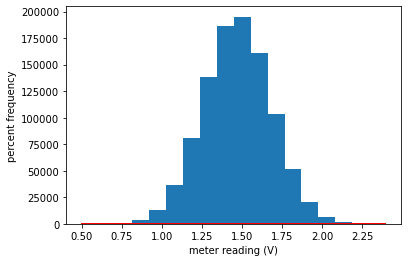

We took a sample of 1000000 measurements.
Sample mean voltage is 1.4699539999999995 V, and sample standard deviation is 0.20206676590671713 V.
Standard error is 0.00020206676590671713 V,  and it is known to precision 2.0206676590671714e-07 V.
How many sig figs should we report for this measurement result of 1.4699539999999995 +/- 0.00020206676590671713 V ?


In [4]:
N_measurements = 1000000
least_count = 0.1 # smallest read digit on knob - be sure to modify decimals below to match
decimals = 1
sigma = 0.2 # 'true' standard deviation, signifying how much the meter reading fluctuates over time
#np.random.seed(os.urandom(1))
experiment2 = np.random.normal(trueV, sigma, N_measurements)
#print(experiment2)
experiment3 = experiment2

i = 0
while i < len(experiment2): 
    experiment3[i] = round(experiment2[i],decimals)
    i += 1
#print(experiment3)
nBins = max( 1 , int((max(experiment3)-min(experiment3))/least_count) )

count, bins, ignored = plt.hist(experiment3, nBins)
#count, bins, ignored = plt.hist(experiment3, nBins, normed=False)
xvals = np.arange( min(experiment3) , max(experiment3) , 0.005)
plt.plot(xvals, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(xvals-trueV)**2/(2*sigma**2)), linewidth=2, color='r')
plt.xlabel('meter reading (V)')
plt.ylabel('percent frequency')
#plt.ylabel('count')
plt.show()
N = len(experiment3)
meanV = mean(experiment3) 
stdev = std(experiment3)
print("We took a sample of",N,"measurements.")
print("Sample mean voltage is", meanV, "V, and sample standard deviation is",stdev,"V.")
std_err = stdev/sqrt(N)
print("Standard error is",std_err,"V,"," and it is known to precision",std_err/sqrt(N),"V.")
print("How many sig figs should we report for this measurement result of",meanV,"+/-",std_err,"V ?")

# References

Experimental Measurements: Precision, Error and Truth, 2nd Ed., N.C. Barford.  ISBN 0471907014.
<img src="barford.png" alt="NYS MTP" width="200" height="200"/>
